In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/headbrain/headbrain.csv


In [24]:
filename = '/kaggle/input/headbrain/headbrain.csv'
df = pd.read_csv(filename)
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [25]:
df.shape

(237, 4)

In [26]:
#checking for null values
df.isnull().sum()


Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [27]:
#eda
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

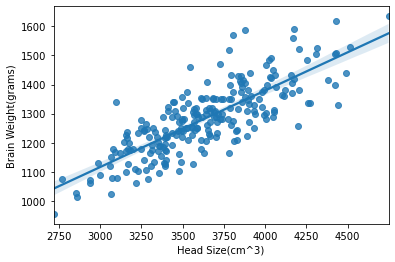

In [28]:
sns.regplot(x=df['Head Size(cm^3)'],y=df['Brain Weight(grams)'])

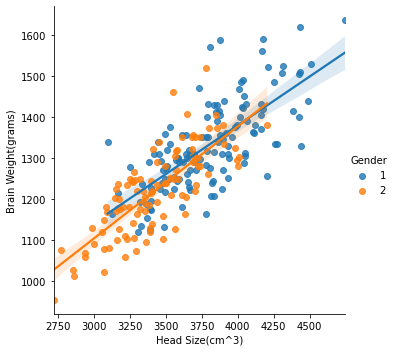

In [29]:
sns.lmplot(x='Head Size(cm^3)',y='Brain Weight(grams)',hue='Gender',data=df)

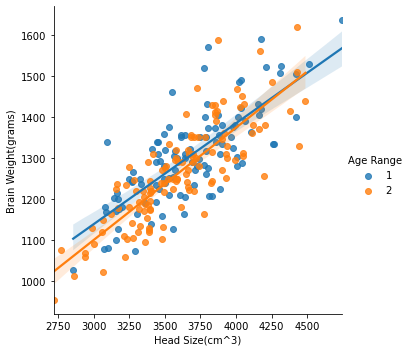

In [30]:
sns.lmplot(x='Head Size(cm^3)',y='Brain Weight(grams)',hue='Age Range',data=df)

In [31]:
#using head size for predicting brain size by applying linear regression from scratch

In [32]:
# y = mx+ c
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

#mean
X_mean = np.mean(X)
y_mean = np.mean(y)

#length
n = len(X)

numerator=0
denominator=0

for i in range(n):
    numerator += (X[i]-X_mean)*(y[i]-y_mean)
    denominator += (X[i]-X_mean)**2
    
m = numerator/denominator
c = y_mean - (m*X_mean)

print(m,c)

0.26342933948939945 325.57342104944223


In [33]:
#predicting brain size
#brain wiegts = m*(head size) + c
y_preds=[]
for i in range(n):
    y_preds.append(m*X[i]+c)
    
y_preds

[1514.1666008256125,
 1310.2722920608173,
 1448.0458366137732,
 1320.546036300904,
 1425.9177720966638,
 1269.9676031189392,
 1322.6534710168191,
 1263.118440292215,
 1277.3436246246424,
 1374.549050896231,
 1232.5606369114446,
 1377.4467736306142,
 1284.4562167908562,
 1434.0840816208351,
 1335.034649972821,
 1346.6255409103546,
 1246.785821243872,
 1238.6195117197008,
 1140.8872267691336,
 1490.9848189505453,
 1347.1523995893333,
 1391.4085286235525,
 1327.6586284671178,
 1302.8962705551141,
 1576.0724956056215,
 1490.721389611056,
 1388.7742352286584,
 1385.0862244758068,
 1235.4583596458278,
 1425.390913417685,
 1323.1803296957978,
 1325.5511937512024,
 1406.424000974448,
 1421.7029026648333,
 1420.9126146463652,
 1330.2929218620118,
 1254.688701428554,
 1312.9065854557114,
 1203.8468389071,
 1245.468674546425,
 1369.2804641064429,
 1248.8932559597874,
 1462.271020946201,
 1327.6586284671178,
 1343.2009594969923,
 1388.2473765496795,
 1460.427015569775,
 1159.3272805333913,
 1284.7

In [35]:
#measuring accuracy using root mean squared error
rsme=0
for i in range(n):
    rsme+=(y[i]-y_preds[i])**2
    
rsme=np.sqrt(rsme/n)
rsme

72.1206213783709

In [54]:
#using sklearn for linear regression
#X.shape
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df['Head Size(cm^3)']
y = df['Brain Weight(grams)']

X=np.array(X).reshape(-1,1)
#X.shape

reg = LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(X)
y_pred

array([1514.16660083, 1310.27229206, 1448.04583661, 1320.5460363 ,
       1425.9177721 , 1269.96760312, 1322.65347102, 1263.11844029,
       1277.34362462, 1374.5490509 , 1232.56063691, 1377.44677363,
       1284.45621679, 1434.08408162, 1335.03464997, 1346.62554091,
       1246.78582124, 1238.61951172, 1140.88722677, 1490.98481895,
       1347.15239959, 1391.40852862, 1327.65862847, 1302.89627056,
       1576.07249561, 1490.72138961, 1388.77423523, 1385.08622448,
       1235.45835965, 1425.39091342, 1323.1803297 , 1325.55119375,
       1406.42400097, 1421.70290266, 1420.91261465, 1330.29292186,
       1254.68870143, 1312.90658546, 1203.84683891, 1245.46867455,
       1369.28046411, 1248.89325596, 1462.27102095, 1327.65862847,
       1343.2009595 , 1388.24737655, 1460.42701557, 1159.32728053,
       1284.71964613, 1285.50993415, 1350.576981  , 1324.76090573,
       1450.41670067, 1395.88682739, 1382.45193108, 1236.512077  ,
       1350.31355166, 1423.02004936, 1362.16787194, 1292.09566

In [55]:
#calculating rsme
rsme = np.sqrt(mean_squared_error(y,y_pred))
rsme

72.1206213783709